# Dimensionality Reduction

## PCA in dimensionality Reduction

PCA stands for Principal Component Analysis.

PCA is a unsupervised dimentionality reduction technique used to reduce a high dimensional dataset into a smaller subset of principal components (PC), wich explains most of the variability observed in the original dataset.

In other words: A linear combination of the input variables in thee dataset that maximizes the variance.

Each PC is a linear combination of the input features, orthogonal to the other componets and maximizes the remainning variance wich is left unexplainned by previous PCs.We can build as many PCs as variables in the dataset but it is often possible for a few of the first  PCs to capture most of the information in the original dataset, as well as most of its relationship to the target.

**notes:**
- PCA assumes that variables are continuous
- It is a **bad practice** to apply PCA in **cathegorical variables**, even after using one hot encoding or ordinal encoding (there are better methods).

**Applying PCA in Dimensionality reduction can:**
- Avoid the dimensionality curse
- Train faster models (more efficient), after all, there is less data.
- Make input variables with no colinearity (some estimators assume no colinearity)



**colocar imagem aqui**

### bjectives:
- Reduce the number of input features
- Identify features that are not relevant
- Noise reduction (excluding less relevant input features)
- Reduce overfitting probability
- Can increse model score
- Make vdata visualization easyer
- Make new features based on existing features

The main objective of applying PCA in your data is to make a new array of features based that is smaller and can keep the properties of the original data.

To get there, PCA uses a linear combination to transform a an array of input features X into a new array X'



# Step by Step

## PCA in a simple dataset

In [5]:
# import basic libraries
import numpy as np
import pandas as pd

# import data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns

# import sklearn modules
from sklearn import datasets
from sklearn.model_selection import train_test_split

# load iris dataset
iris = datasets.load_iris(as_frame=True)

# set up features and target
X = iris.data
y = iris.target

# train test split
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.2,
                                                   random_state=42, stratify=y)

In [6]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
8,4.4,2.9,1.4,0.2
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4
9,4.9,3.1,1.5,0.1
89,5.5,2.5,4.0,1.3


The iris dataset has 4 features.

Now apply PCA to find the PC.

It's important to note that PCA requires the standardized data.

Use StandardScaler

In [10]:
# import Standard Scaler
from sklearn.preprocessing import StandardScaler

# instantiate scale
standardScaler = StandardScaler()

# fit_transform the features
X_scaled = standardScaler.fit_transform(X_train)

# make a pandas dataframe with scaled data
X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)

X_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-1.721568,-0.332101,-1.345722,-1.323276
1,-1.124492,-1.227655,0.414505,0.651763
2,1.144395,-0.555990,0.584850,0.256755
3,-1.124492,0.115676,-1.288941,-1.454945
4,-0.408002,-1.227655,0.130598,0.125086


In [11]:
# apply PCA with n_componets

# import decomposition.PCA
from sklearn.decomposition import PCA

# instantiate PCA
pca = PCA()

# fit PCA
pca.fit(X_scaled)

PCA()

In [12]:
# apply pca with 2 input features
pca2 = PCA(n_components=2)

# fit PCA
pca2.fit(X_scaled)

PCA(n_components=2)

Alguns atributos do pca

In [14]:
# nome das features de entrada
pca.feature_names_in_

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], dtype=object)

In [18]:
# n_components_: quantidade de componentes
pca.n_components_, pca2.n_components_

(4, 2)

In [21]:
# components_: coeficientes da combinaćão linear
pca.components_

array([[ 0.52679335, -0.25307206,  0.58186918,  0.56557189],
       [ 0.34813945,  0.93470791,  0.02689438,  0.06630793],
       [-0.72745724,  0.22196252,  0.1386138 ,  0.6342908 ],
       [ 0.26850263, -0.11405393, -0.80093144,  0.52288323]])

the atribute components_ returns the $\alpha_{i, k}$ that determines the linear componets of each PC.

In [24]:
# quantidade de variância explicada por cada um dos componentes
pca.explained_variance_

array([2.93151868, 0.93042018, 0.15254729, 0.01912729])

In [28]:
# porcentagem de variância explicada por cada uma das componentes
pca.explained_variance_ratio_

array([0.72677234, 0.23066667, 0.03781901, 0.00474197])

In [29]:
# ver a porcentagem acumulada da variância
pca.explained_variance_ratio_.cumsum()

array([0.72677234, 0.95743901, 0.99525803, 1.        ])

Para melhor visualizar, vamos plotar os resultados acima:

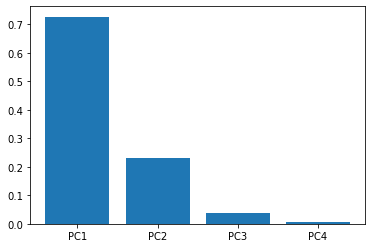

In [33]:
# cria labels para o eixo x
labels = [f'PC{i+1}' for i in range(X_train.shape[1])]

# make bar graph of explained_variance_ratio_
plt.bar(labels, pca.explained_variance_ratio_)
plt.show;

Esse gráfico é conhecido como **scree plot**.

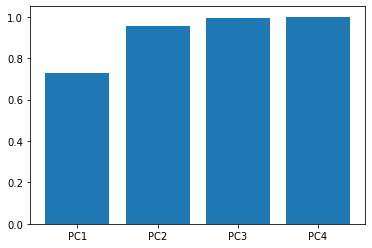

In [34]:
# gráfico de barras do pca.explained_variance_ratio.cumsum()
plt.bar(labels, pca.explained_variance_ratio_.cumsum())
plt.show;

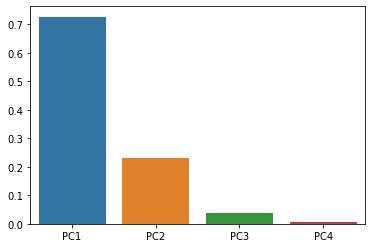

In [37]:
# try with seaborn
sns.barplot(x=labels, y=pca.explained_variance_ratio_);

O pca não elimina features, estamos tentando simplificar o modelo criando componentes (combinaćão linear das features) e o trade off é a perda de precisão.

usando esses dois gráficos é possível definir quantas componentes principais queremos no nosso modelo.

## Escolher o número de componentes

se o scree plot apresentar autovalores com valores similares, concluímos que os nossos dados já esrtão projetados em um bom espaćo e não precisamos transforma-los.

Vamos incorporar o PCA em nossa pipeline

## PCA in a pipeline

In [41]:
# make classification metrics function

# import classification metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

#classification metrics function
def classification_metrics(estimator, X_train, X_test, y_train, y_test):
    '''
    this function returns classification metrics
    '''
    
    # train metrics
    print("\nTrain Metrics:")
    
    y_pred_train = estimator.predict(X_train)
    
    # make confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show();
    
    # make classification report
    print(classification_report(y_train, y_pred_train))
    
    # test metrics
    print("\n Test Metrics:")
    y_pred_test = estimator.predict(X_test)
    
    # make confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show();
    
    # make classification report
    print(classification_report(y_test, y_pred_test))
    

In [42]:
# import sklearn modules
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


Train Metrics:


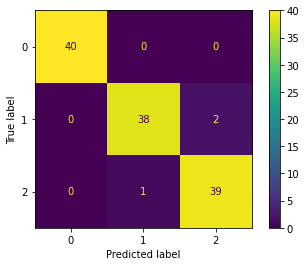

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.95      0.96        40
           2       0.95      0.97      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120


 Test Metrics:


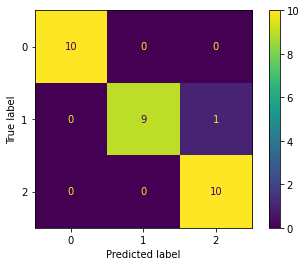

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [45]:
# LogisticRegression pipeline
pipeline = Pipeline([
    ('model', LogisticRegression(random_state=42))
])

#fit do pipe no treino e teste
pipeline.fit(X_train, y_train)

# print classification metrics
classification_metrics(pipeline, X_train, X_test, y_train, y_test)

Comparando com 2 componentes


Train Metrics:


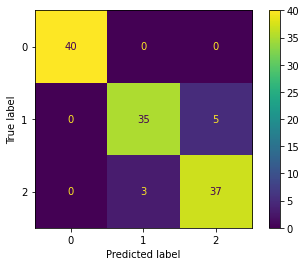

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.92      0.88      0.90        40
           2       0.88      0.93      0.90        40

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120


 Test Metrics:


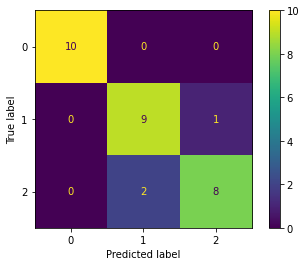

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [46]:
# pipeline with 2 components
pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('model', LogisticRegression(random_state=42))
])

# fit pipeline2
pipeline2.fit(X_train, y_train)

# print classification metrics
classification_metrics(pipeline2, X_train, X_test, y_train, y_test)

In [47]:
pipeline2.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('pca', PCA(n_components=2)),
  ('model', LogisticRegression(random_state=42))],
 'verbose': False,
 'scaler': StandardScaler(),
 'pca': PCA(n_components=2),
 'model': LogisticRegression(random_state=42),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 2,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 100,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l2',
 'model__random_state': 42,
 'model__solver': 'lbfgs',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

In [49]:
pipeline2['pca'].n_components_

2